# Gradient decent

$$ \sim \mathcal{U}(0,1)$

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

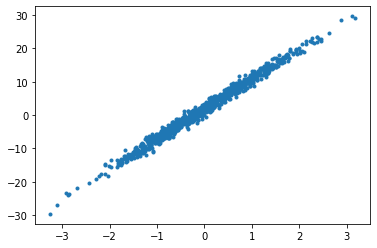

In [92]:
samples = 1000
X = np.random.randn(samples, 1)
noice = np.random.randn(samples, 1)
y = 2 + 9 * X + noice
plt.plot(X, y, ".")

In [93]:
X = np.c_[np.ones(samples), X] # concatenates
X[:5]

array([[ 1.        , -0.66166088],
       [ 1.        ,  0.51139765],
       [ 1.        ,  1.51958971],
       [ 1.        , -0.77454014],
       [ 1.        , -0.14092771]])

## Train|Test split

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
#help(train_test_split) # to get the code below

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((670, 2), (330, 2), (670, 1), (330, 1))

In [96]:
def gradient_decent(X, y, learning_rate = .1, epochs = 100):
    m = len(X)

    theta = np.random.randn(X.shape[1], 1)

    for _ in range(epochs):
        gradient = 2/m * X.T @ (X @ theta - y)
        theta -= learning_rate * gradient

    return theta

theta = gradient_decent(X_train, y_train)
theta.reshape(-1)

array([1.97326603, 8.97050165])

In [97]:
X_train.shape[1]

2

In [98]:
epochs = range(1, 200)
thetas = np.array([gradient_decent(X_train, y_train, epochs = epoch).reshape(-1) for epoch in epochs])
thetas.shape

(199, 2)

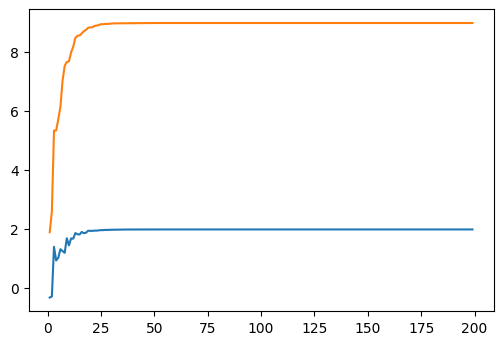

In [99]:
fig, ax = plt.figure(dpi=100), plt.axes()
ax.plot(epochs, thetas)

# Stochastic gradient decent (SGD)

In [112]:
epochs = 10
t0, t1 = 5, 50 # learning scheduele parameters

def learning_rate_schedule(t):
    """Decrease learning rate as training progress"""
    return t0 / (t + t1)

theta = np.random.randn(2,1)
m = len(X_train)

for epoch in range(epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        x_i = X_train[random_index:random_index+1]
        y_i = y_train[random_index:random_index+1]

        gradients = 2 * x_i.T.dot(x_i.dot(theta) - y_i)
        eta = learning_rate_schedule(epoch * m + i)

        theta -= eta * gradients
theta

array([[1.99020535],
       [8.96967276]])